<a href="https://colab.research.google.com/github/ivn-srg/data-analysis-course-omsu/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%2014/%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ансамблевые методы: Random Forest и Gradient Boosting для регрессии

## 1. Ансамбли моделей
Ансамбль (от франц. ensemble — «совокупность, стройное целое») — согласованность, единство частей, образующих что-либо целое.


Ансамбль объединяет **несколько простых моделей** («базовых») так, чтобы вместе они работали точнее, чем каждая по-отдельности.  
- **Bagging** (Bootstrap Aggregation) – строит каждую модель на случайной подвыборке и усредняет (или голосует).  
- **Boosting** – строит модели последовательно, каждая «исправляет» ошибки предыдущих.

📊 **Зачем?** Снижение переобучения, более стабильные и точные прогнозы.

---

## 2. Случайный лес (Random Forest)  
- **Тип ансамбля:** Bagging.  
- **Базовые модели:** Деревья решений.  
- **Как устроен:**  
  1. Генерируем N бутстрэп-выборок из исходных данных.  
  2. На каждой обучаем отдельное дерево, выбирая на сплите случайный поднабор признаков.  
  3. Прогнозы усредняем (регрессия) или голосуем (классификация).  
- **Плюсы:**  
  - Устойчив к шуму и выбросам  
  - Автоматически оценивает важность признаков  
  - Минимальная настройка гиперпараметров  

---

## 3. Градиентный бустинг (Gradient Boosting)  
- **Тип ансамбля:** Boosting.  
- **Базовые модели:** Слабые (обычно мелкие деревья).  
- **Как устроен:**  
  1. Начинаем с простого предсказания (обычно среднее).  
  2. На каждом шаге строим дерево на **остатках** (градиенте ошибки) текущего ансамбля.  
  3. Обновляем ансамбль: добавляем новое дерево с весом `learning_rate`.  
  4. Повторяем M раз.  
- **Плюсы:**  
  - Высокая точность  
  - Гибкость функций потерь  
  - Настраиваемая скорость обучения и глубина деревьев  

---


#🌲 Что такое Random Forest (Случайный лес)
Случайный лес — это **ансамблевая модель**, которая строится из множества отдельных деревьев решений (Decision Trees), но каждое дерево:

- обучается на случайной подвыборке данных (bagging),

- и использует случайное подмножество признаков при каждом сплите (разделении).

👉 Это делает модель более устойчивой к переобучению, чем одно дерево.

##📌 Как работает Random Forest пошагово:
1. Формируется N случайных выборок из исходных данных с возвращением (bootstrapping).

2. Для каждой выборки обучается своё дерево решений.

3. На каждом шаге сплита дерево выбирает лучшее разбиение не из всех признаков, а из случайного подмножества.

4. Предсказание:
  - В регрессии — усредняются предсказания всех деревьев.

  - В классификации — берётся голосование большинства.

## 🚀 Градиентный бустинг (Gradient Boosting)
Градиентный бустинг — это ансамблевая модель, которая последовательно строит слабые модели (обычно деревья), каждая из которых корректирует ошибки предыдущих.

###📌 Суть идеи:
В отличие от случайного леса, где деревья строятся параллельно и независимо, градиентный бустинг строит деревья последовательно, каждый раз обучаясь на ошибках предыдущей модели.

###⚙️ Как работает пошагово:
1. Начинаем с простого прогноза (например, среднего по целевой переменной).

2. Вычисляем остатки (ошибки предсказания).

3. Обучаем новое дерево на остатках.

4. Обновляем общее предсказание:
$$ F_{m}(x) = F_{m-1}(x) + \nu \cdot h_m(x) $$
   где:
   -  F_m(x)  — текущее предсказание,
   - h_m(x) — новое дерево (предсказание на ошибках),
   - v — темп обучения (learning rate).

5. Повторяем шаги 2–4 N раз.

###📚 Почему «градиентный»?
Потому что на каждом шаге мы минимизируем функцию потерь (например, MSE), а деревья строятся таким образом, чтобы приближать отрицательный градиент этой функции — отсюда и название.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Оценка модели случайного леса
print("Случайный лес:")
print("Точность:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Обучение градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Оценка модели градиентного бустинга
print("Градиентный бустинг:")
print("Точность:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


Случайный лес:
Точность: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Градиентный бустинг:
Точность: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Загрузка и преобразование в pandas DataFrame
data = pd.read_csv('/content/Car_Prices_Poland_Kaggle.csv').dropna()

enc = LabelEncoder()

for col in data.select_dtypes('object'):
  data[col] = enc.fit_transform(data[col])

X = data.drop('price', axis = 1)
y = data['price']

# 2. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Случайный лес (ансамбль по bagging)
rf = RandomForestRegressor(
    n_estimators=100,     # число деревьев
    max_depth=None,       # глубина — без ограничения
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 4. Градиентный бустинг (ансамбль по boosting)
gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# 5. Оценка качества моделей
def evaluate(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"🔹 {model_name}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.3f}\n")

evaluate(y_test, y_pred_rf, "Random Forest Regressor")
evaluate(y_test, y_pred_gb, "Gradient Boosting Regressor")

🔹 Random Forest Regressor
  RMSE: 346154147.47
  R²:   0.942

🔹 Gradient Boosting Regressor
  RMSE: 581911360.75
  R²:   0.902



In [ ]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb)
])
ensemble.fit(X_train, y_train)
y_pred_ens = ensemble.predict(X_test)

evaluate(y_test, y_pred_ens, "Ensemble (RF + GB)")


🔹 Ensemble (RF + GB)
  RMSE: 401277695.28
  R²:   0.932



## Ниже — 3 примера инструментов бустинга: XGBoost, LightGBM, CatBoost на задаче регрессии с load_diabetes, включая визуализацию важности признаков.

## 🐍 1. XGBoost (eXtreme Gradient Boosting)

XGBoost RMSE: 3063.27


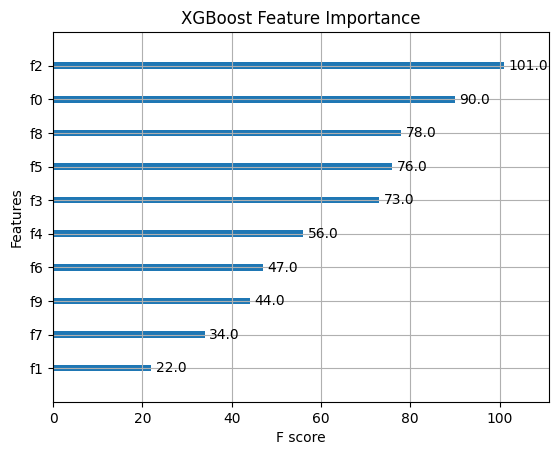

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"XGBoost RMSE: {rmse:.2f}")

# Важность признаков
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()


## 🌿 2. LightGBM (Light Gradient Boosting Machine)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 331, number of used features: 10
[LightGBM] [Info] Start training from score 154.344411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

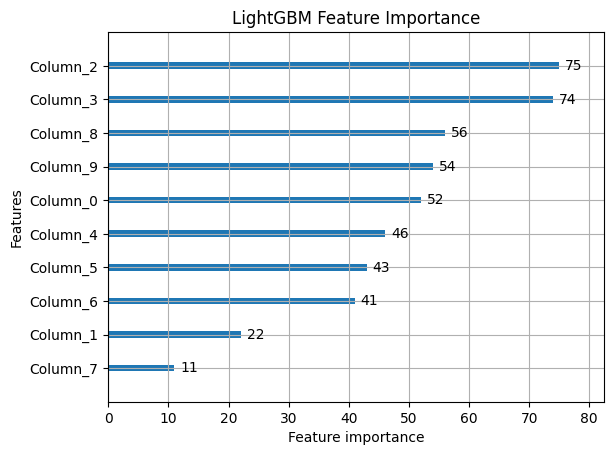

In [ ]:
import lightgbm as lgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"LightGBM RMSE: {rmse:.2f}")

# Важность признаков
lgb.plot_importance(model, importance_type='split', max_num_features=10)
plt.title("LightGBM Feature Importance")
plt.show()


## 🐈 3. CatBoost (Category Boosting — без кодирования категорий)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


CatBoost RMSE: 2743.67


(array([2., 5., 0., 0., 1., 0., 1., 0., 0., 1.]),
 array([ 2.34248699,  5.08742146,  7.83235593, 10.5772904 , 13.32222486,
        16.06715933, 18.8120938 , 21.55702827, 24.30196274, 27.0468972 ,
        29.79183167]),
 <BarContainer object of 10 artists>)

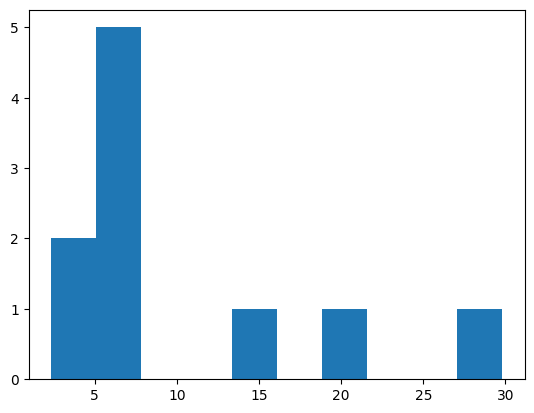

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
print(f"CatBoost RMSE: {rmse:.2f}")

# Важность признаков
plt.hist(model.feature_importances_)